# Desafío 3

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

#### 1.Mediante el uso de números aleatorios, generar una población de tamaño N, de modo tal
#### que la media poblacional sea 50 y el desvío poblacional sea 10. Los valores a ensayar son con
#### (N;n) = (4000;100), (400;100) y (40;10).

In [2]:
poblacion_grande =  np.random.normal(loc = 50, scale = 10, size = 4000)
poblacion_mediana = np.random.normal(loc = 50, scale = 10, size = 400)
poblacion_chica = np.random.normal(loc = 50, scale = 10, size = 40)

In [3]:
def poblaciones(poblacion):
    print('Poblacion de: ', poblacion.size,'\n', poblacion, '\n', '-'*100)
    

    print('La media de la poblacion es:   ', np.mean(poblacion))
    media_manual = sum(poblacion)/poblacion.size
    print( 'Le media de la poblacion calculada es:  ', media_manual, '\n', '-'*100)  #Calculo manual para verificar

    
    print('El desvio de la poblacion es:   ', np.std(poblacion))
    desvio_manual = np.sqrt((sum((poblacion - media_manual)**2))/poblacion.size) #Calculo manual para verificar
    print( 'El desvio de la poblacion calculado es:  ', desvio_manual, '\n', '#'*100)

In [4]:
poblaciones(poblacion_grande)

Poblacion de:  4000 
 [32.41973393 55.58172264 50.45890684 ... 37.44853672 50.86644915
 52.89826416] 
 ----------------------------------------------------------------------------------------------------
La media de la poblacion es:    49.984752860826994
Le media de la poblacion calculada es:   49.98475286082701 
 ----------------------------------------------------------------------------------------------------
El desvio de la poblacion es:    10.128145197133517
El desvio de la poblacion calculado es:   10.12814519713353 
 ####################################################################################################


In [5]:
poblaciones(poblacion_mediana)

Poblacion de:  400 
 [57.28947266 49.7591477  21.81844144 52.78756988 52.02287104 42.08830088
 63.62228627 67.05108881 65.23533003 46.20686188 73.69779566 59.07160104
 67.25437026 55.94428117 49.69991394 51.10291463 36.76263912 43.64024693
 58.98677807 49.95190658 51.00635134 42.31396855 57.46739986 18.30236542
 48.33886502 53.09506496 43.68225741 41.48130321 47.99817497 45.60481465
 50.79725918 63.28134502 45.46375321 45.07834741 57.42855429 40.44721254
 57.39860424 45.35592652 57.40181778 53.10985651 60.88334397 34.72303849
 40.26943467 59.80360018 68.58238422 53.73243302 33.73595828 42.6411733
 60.70285863 64.58132453 44.10661392 53.28133102 35.05154346 43.94742959
 57.35345671 76.50583841 55.67782423 48.9125722  49.07024913 57.3942649
 63.53646982 52.58847479 41.02620785 56.73449657 56.72084364 72.25394092
 46.7195018  57.39999051 61.8549601  54.25908312 38.14821995 51.91374822
 37.97157131 70.29042888 46.10570193 54.08908247 36.50753911 49.737665
 38.22382138 52.33000955 49.259953

In [6]:
poblaciones(poblacion_chica)

Poblacion de:  40 
 [54.98903207 57.20812574 57.88320535 52.41163951 53.12465662 19.68517821
 43.61591121 41.42919639 42.22716517 50.90770889 41.88233725 44.75133949
 57.3342363  42.81796622 32.25229261 48.43791462 37.51802077 42.28960102
 48.51058928 43.18833853 43.81198557 54.44396197 40.65406028 55.11071947
 67.68325056 49.11721939 59.20911032 62.07482535 58.75733001 29.01430207
 52.00026199 60.25675209 65.63079765 35.45079145 51.22189603 37.39944101
 59.06661371 61.24422986 59.62810573 51.15159076] 
 ----------------------------------------------------------------------------------------------------
La media de la poblacion es:    49.134792513703886
Le media de la poblacion calculada es:   49.1347925137039 
 ----------------------------------------------------------------------------------------------------
El desvio de la poblacion es:    10.31987731880134
El desvio de la poblacion calculado es:   10.31987731880134 
 ################################################################

### Para cada uno de los puntos siguientes, debajo de su respectiva consigna se muestran las funciones y variables que van a desarrollar el punto. Después se ejecutan todas las funciones en simultáneo para cada una de las tres poblaciones a ensayar. 

#### 2. Tomar, de la población generada, K=1000 muestras de tamaño n. Para cada una de las
#### muestras, el proceso de muestreo es sin reposición. Calcular la media y el desvío insesgado
#### para cada una de las muestras.

In [7]:
import random

In [8]:
muestras = []
medias_muestrales = []
desvios_muestrales = []

In [9]:
def muestreo(poblacion,tam_muestra, cant_muestras):
    
    n = 0
    
    
    while n < cant_muestras:
        muestra_nueva = random.sample(list(poblacion.flatten()),tam_muestra)
        media_nueva = sum(muestra_nueva)/tam_muestra
        desvio_nuevo = np.sqrt((sum((muestra_nueva - media_nueva)**2))/(tam_muestra - 1)) #desvio insesgado: "(tam_muestra - 1)"
        
        muestras.append(muestra_nueva)
        medias_muestrales.append(media_nueva)
        desvios_muestrales.append(desvio_nuevo)
        
        n=n+1
    
    
    #Tabla con la media y el desvio de cada una de las 1000 muestras:
    medias_y_desvios = list(zip(medias_muestrales, desvios_muestrales))
    df = pd.DataFrame(medias_y_desvios, columns = ['Medias', 'Desvios'])
    print(df)
    

#### 3. Tabular y graficar la frecuencia (en categorías adecuadas de modo que haya 45 categorías),
#### para la media muestral y para el desvío muestral de las muestras obtenidas.

In [10]:
def frecuencia_medias():
    #Tabla con 45 intervalos para los valores de las medias de las muestras y su frecuencia:
    medias_ordenadas = sorted(medias_muestrales)
    
    freq_medias =pd.cut(medias_ordenadas,45, precision = 2).value_counts()   
    print(pd.DataFrame(freq_medias, columns = ['Intervalos          Frecuencia',]))
    print('Total                                     ', sum(freq_medias), '\n'*3)
    
    print('El gráfico muestra 45 intervalos de igual tamaño para el rango de medias muestrales obtenidas y la frecuencia con la que las medias muestrales ocurren en cada rango')
    freq_medias.plot.bar(x='Intervalos', y = 'Frecuencia', figsize = (30,10))  

In [11]:
def frecuencia_desvios():
    #Tabla con 45 intervalos para los valores de los desvios de las muestras y su frecuencia:
    desvios_ordenados = sorted(desvios_muestrales)
    
    freq_desvios =pd.cut(desvios_ordenados,45, precision = 2).value_counts()   
    print(pd.DataFrame(freq_desvios, columns = ['Intervalos          Frecuencia',]))
    print('Total                                     ', sum(freq_desvios), '\n'*3)
    
    print('El gráfico muestra 45 intervalos de igual tamaño para el rango de desvios muestrales obtenidos y la frecuencia con la que los desvios muestrales ocurren en cada rango')
    freq_desvios.plot.bar(x='Intervalos', y = 'Frecuencia', figsize = (30,10))

In [12]:
def limpiar_listas():
    muestras.clear()
    medias_muestrales.clear()
    desvios_muestrales.clear()

#### 4. Calcular, en base a la tabla obtenida en el punto anterior, el promedio y el desvío de la media
#### muestral. Explicar cómo se relaciona lo obtenido con los conceptos teóricos asociados.

In [13]:
def media_desvio_de_medias(tam_poblacion, tam_muestra):
    
    media_de_medias = np.mean(medias_muestrales)
    
    
    factor_de_correccion = np.sqrt((tam_poblacion - tam_muestra)/(tam_poblacion - 1))
    calculo_desvio_de_medias = (10/np.sqrt(tam_muestra))*factor_de_correccion
    
    print('El promedios de las mil medias muestrales realizadas para esta población es:   ', media_de_medias, '\n'*3)
    print('El desvio estandar de las mil medias muestrales realizadas para esta población es:   ', calculo_desvio_de_medias, '\n'*1)    

#### 5. Para cada una de las muestras tomadas, construir un intervalo de confianza del 95% y
#### calcular qué porcentaje de estos intervalos contienen a la media poblacional. Indicar si lo
#### observado está alineado con lo que explica la teoría.

In [14]:
from scipy import stats

In [15]:
def intervalos_confianza(tam_poblacion,tam_muestra,medias = medias_muestrales,confianza=0.95):
    
    
    factor_de_correccion = np.sqrt((tam_poblacion - tam_muestra)/(tam_poblacion - 1))
    calculo_desvio= (10/np.sqrt(tam_muestra))*factor_de_correccion
    
    
    b = np.mean(medias)
    conf_int_b = stats.norm.interval(confianza, loc=b, scale=calculo_desvio)
    print('{:0.2%} de los intervalos de las medias contienen a la media poblacional'
          .format(1-2*(((b >= conf_int_b[0]) & (b < conf_int_b[1])).sum() / float(tam_poblacion))))     # 1 - 2*(alfa/2)

    

# Poblacion Chica:

#### Tabla con las medias y los desvíos insesgados de 1000 muestras de tamaño 10 de una población de 40


In [16]:
muestreo(poblacion_chica,10,1000)

        Medias    Desvios
0    49.521792   7.667267
1    51.292129   8.225929
2    48.364763  11.781228
3    48.313797   8.309684
4    53.559454   9.186724
5    48.351766  12.693277
6    48.149583  10.761695
7    54.856912   9.231758
8    52.102558   9.398700
9    48.708384   9.774891
10   51.619792  10.863965
11   46.514740   9.353748
12   54.206466   7.609953
13   50.352488   9.650377
14   50.311708  13.543002
15   48.960523   8.610153
16   50.408372  11.734152
17   44.470468  10.169890
18   49.026572   9.920209
19   50.561119   9.545616
20   47.151315   8.813377
21   49.089272   6.890242
22   53.068585  10.865352
23   50.354953   8.462097
24   44.647175  11.567533
25   50.245371   8.987763
26   55.591145   7.989499
27   44.727216   9.465770
28   52.421661   7.731812
29   46.157832  12.908574
..         ...        ...
970  52.635641   9.183757
971  43.137708  13.594277
972  47.153161  11.685346
973  45.457922  13.735577
974  50.428324   7.478573
975  47.432429   9.861744
976  53.6866

#### Tabla con 45 intervalos de igual tamaño para el rango de las medias muestrales y su frecuencia

                Intervalos          Frecuencia
(38.81, 39.26]                               1
(39.26, 39.69]                               0
(39.69, 40.12]                               0
(40.12, 40.55]                               1
(40.55, 40.98]                               2
(40.98, 41.41]                               0
(41.41, 41.84]                               1
(41.84, 42.27]                               2
(42.27, 42.7]                                6
(42.7, 43.13]                               10
(43.13, 43.56]                               5
(43.56, 43.99]                               9
(43.99, 44.41]                              10
(44.41, 44.84]                              26
(44.84, 45.27]                              19
(45.27, 45.7]                               30
(45.7, 46.13]                               26
(46.13, 46.56]                              36
(46.56, 46.99]                              40
(46.99, 47.42]                              50
(47.42, 47.85

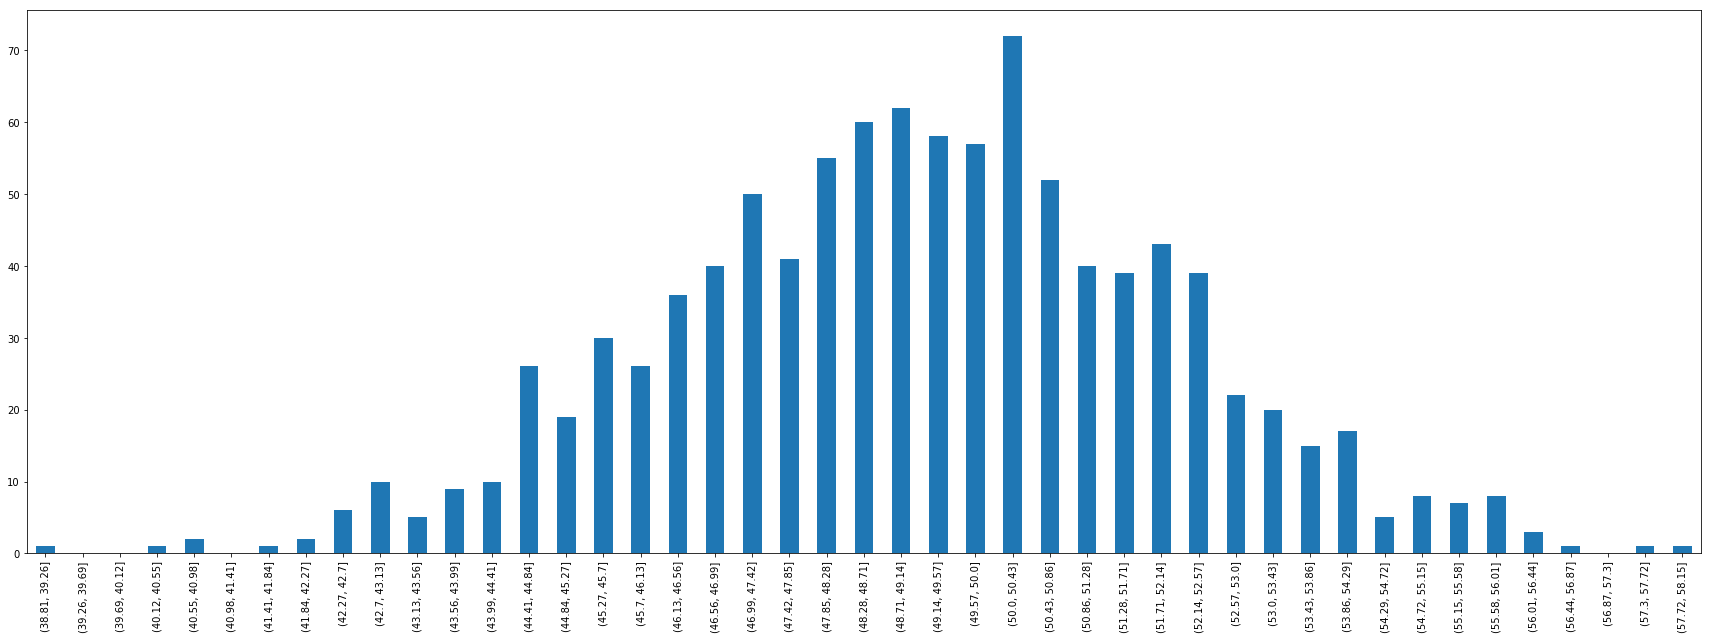

In [17]:
frecuencia_medias()

#### Tabla con 45 intervalos de igual tamaño para el rango de los desvios muestrales y su frecuencia

                Intervalos          Frecuencia
(3.69, 3.97]                                 1
(3.97, 4.25]                                 1
(4.25, 4.53]                                 0
(4.53, 4.8]                                  1
(4.8, 5.08]                                  1
(5.08, 5.35]                                 0
(5.35, 5.63]                                 2
(5.63, 5.91]                                 1
(5.91, 6.18]                                 6
(6.18, 6.46]                                10
(6.46, 6.74]                                11
(6.74, 7.01]                                23
(7.01, 7.29]                                28
(7.29, 7.56]                                28
(7.56, 7.84]                                35
(7.84, 8.12]                                34
(8.12, 8.39]                                47
(8.39, 8.67]                                44
(8.67, 8.95]                                46
(8.95, 9.22]                                48
(9.22, 9.5]  

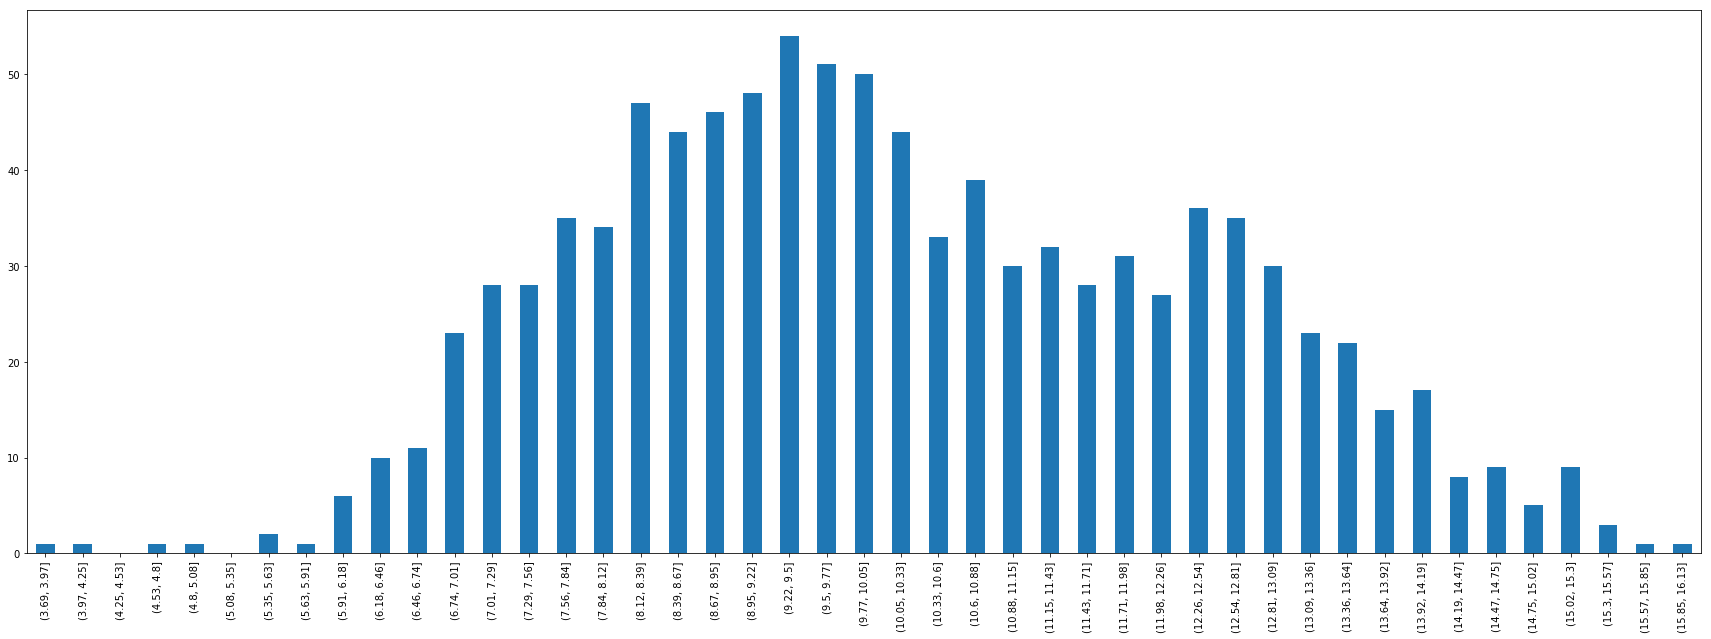

In [18]:
frecuencia_desvios()

In [19]:
media_desvio_de_medias(40,10)

El promedios de las mil medias muestrales realizadas para esta población es:    49.15060253170792 



El desvio estandar de las mil medias muestrales realizadas para esta población es:    2.7735009811261455 



#### De los resultados obtenidos, podemos comprobar que, si sacasemos infinitas muestras de una población y calculasemos sus medias, el promedio de las medias muestrales tiende al valor de la media poblacional. Y, el calculo del desvío, demuestra que si sacasemos infinitas muestras de una población, las medias de las muestras variarían menos que las mediciones indivduales realizadas sobre la población entera. Esa relación se puede computar con los calculos hechos en la función "media_desvio_de_medias".

In [20]:
intervalos_confianza(40,10)

95.00% de los intervalos de las medias contienen a la media poblacional


In [21]:
limpiar_listas()

# Poblacion Mediana

#### Tabla con las medias y los desvíos insesgados de 1000 muestras de tamaño 100 de una población de 400:

In [22]:
muestreo(poblacion_mediana,100,1000)

        Medias    Desvios
0    49.508334  10.558184
1    49.259699   9.871083
2    51.143609   9.920330
3    51.329154  10.457126
4    50.869740   9.771161
5    51.437878   9.430189
6    49.481680  10.070537
7    50.209295  10.398644
8    50.561225  10.652823
9    52.252668  10.000355
10   50.144988   9.648659
11   49.527586  10.254319
12   49.492481   8.979585
13   50.397740   9.945713
14   48.319824  10.370134
15   49.467620   9.610417
16   50.146288  10.435296
17   49.739690  10.308144
18   51.052969  10.730801
19   51.622461   9.879421
20   49.431716  10.509077
21   50.236959  10.868194
22   50.256837   9.934931
23   50.148196   9.453243
24   50.420827  10.173395
25   51.896158   9.293128
26   48.912578   9.171421
27   51.156144   9.727071
28   50.625475  10.427390
29   49.816577   9.809732
..         ...        ...
970  51.890347  10.430811
971  50.490961  10.954368
972  51.346904  11.095717
973  49.067959   9.700945
974  51.081579   9.799915
975  51.466965  10.220757
976  50.0804

#### Tabla con 45 intervalos de igual tamaño para el rango de las medias muestrales y su frecuencia

                Intervalos          Frecuencia
(47.62, 47.74]                               1
(47.74, 47.85]                               0
(47.85, 47.96]                               0
(47.96, 48.07]                               0
(48.07, 48.18]                               1
(48.18, 48.3]                                5
(48.3, 48.41]                                4
(48.41, 48.52]                               7
(48.52, 48.63]                               8
(48.63, 48.74]                               5
(48.74, 48.86]                               9
(48.86, 48.97]                              11
(48.97, 49.08]                              15
(49.08, 49.19]                              15
(49.19, 49.3]                               22
(49.3, 49.41]                               34
(49.41, 49.53]                              32
(49.53, 49.64]                              36
(49.64, 49.75]                              36
(49.75, 49.86]                              46
(49.86, 49.97

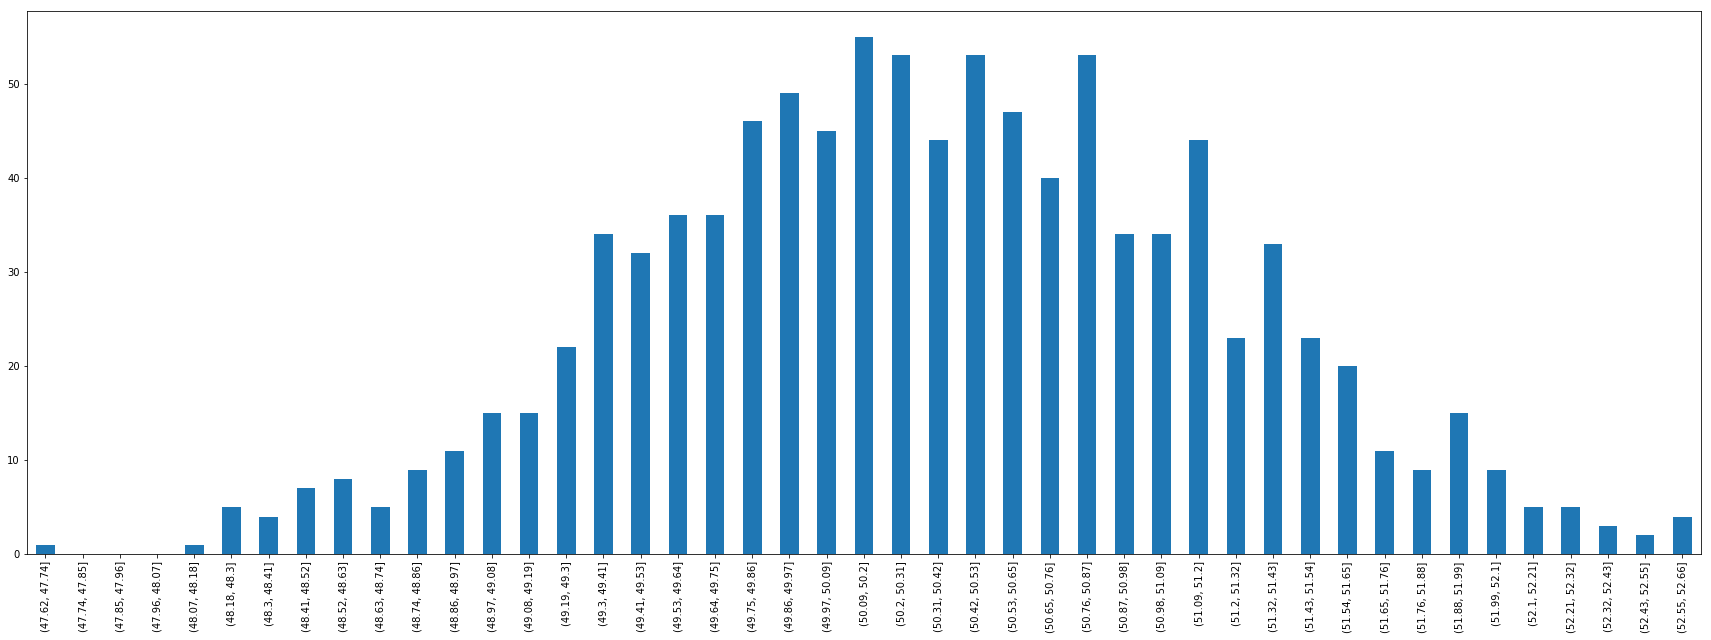

In [23]:
frecuencia_medias()

#### Tabla con 45 intervalos de igual tamaño para el rango de los desvios muestrales y su frecuencia

                Intervalos          Frecuencia
(7.87, 7.97]                                 1
(7.97, 8.07]                                 0
(8.07, 8.16]                                 1
(8.16, 8.26]                                 1
(8.26, 8.35]                                 0
(8.35, 8.45]                                 4
(8.45, 8.54]                                 5
(8.54, 8.64]                                 4
(8.64, 8.73]                                12
(8.73, 8.83]                                 5
(8.83, 8.92]                                 6
(8.92, 9.02]                                19
(9.02, 9.12]                                19
(9.12, 9.21]                                28
(9.21, 9.31]                                17
(9.31, 9.4]                                 33
(9.4, 9.5]                                  27
(9.5, 9.59]                                 47
(9.59, 9.69]                                47
(9.69, 9.78]                                52
(9.78, 9.88] 

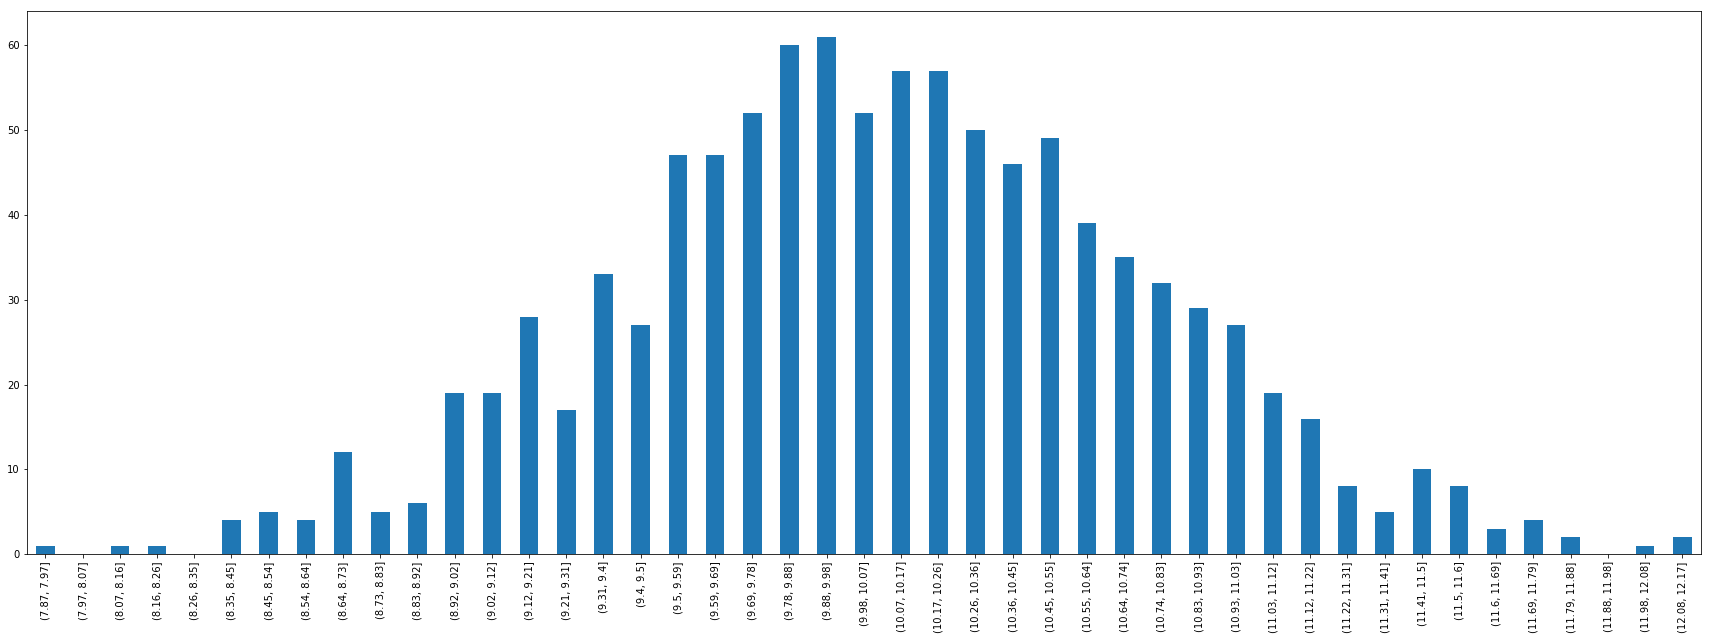

In [24]:
frecuencia_desvios()

In [25]:
media_desvio_de_medias(400,100)

El promedios de las mil medias muestrales realizadas para esta población es:    50.354413484424875 



El desvio estandar de las mil medias muestrales realizadas para esta población es:    0.86710996952412 



#### De los resultados obtenidos, podemos comprobar que, si sacasemos infinitas muestras de una población y calculasemos sus medias, el promedio de las medias muestrales tiende al valor de la media poblacional. Y, el calculo del desvío, demuestra que si sacasemos infinitas muestras de una población, las medias de las muestras variarían menos que las mediciones indivduales realizadas sobre la población entera. Esa relación se puede computar con los calculos hechos en la función "media_desvio_de_medias".

In [26]:
intervalos_confianza(400,100)

99.50% de los intervalos de las medias contienen a la media poblacional


In [27]:
limpiar_listas()

# Poblacion Grande

#### Tabla con las medias y los desvíos insesgados de 1000 muestras de tamaño 100 de una población de 4000:

In [28]:
muestreo(poblacion_grande,100,1000)

        Medias    Desvios
0    49.848403   9.732083
1    49.743830   9.247320
2    48.273557  11.269556
3    50.187988  10.211886
4    48.906491  10.290997
5    49.565119  10.051441
6    50.744007   8.972101
7    49.528176  10.581709
8    48.693813  10.032438
9    49.702149  10.499391
10   48.305397   9.750293
11   51.918607  10.062953
12   49.316884   9.767191
13   48.942211  10.595434
14   49.891311   9.761313
15   48.742720   9.267434
16   50.991476  11.017075
17   46.925496  10.244534
18   47.751232  10.574749
19   49.923876   9.899124
20   51.138181  12.090528
21   50.195261  11.268476
22   49.956725  10.134651
23   49.909333   9.373627
24   50.011705   9.099180
25   50.614555  10.275112
26   49.455680   9.947595
27   51.558347  10.950638
28   49.345666   9.372560
29   49.123297   9.916118
..         ...        ...
970  49.540956   9.309029
971  51.414472   8.845226
972  50.728375  10.222076
973  50.083688  10.292788
974  47.671530   9.996668
975  48.731679  10.731411
976  49.8936

#### Tabla con 45 intervalos de igual tamaño para el rango de las medias muestrales y su frecuencia

                Intervalos          Frecuencia
(46.85, 46.98]                               3
(46.98, 47.11]                               0
(47.11, 47.25]                               3
(47.25, 47.38]                               2
(47.38, 47.51]                               1
(47.51, 47.64]                               2
(47.64, 47.77]                               5
(47.77, 47.9]                                7
(47.9, 48.03]                                5
(48.03, 48.17]                              11
(48.17, 48.3]                                6
(48.3, 48.43]                               20
(48.43, 48.56]                              11
(48.56, 48.69]                              18
(48.69, 48.82]                              27
(48.82, 48.96]                              34
(48.96, 49.09]                              20
(49.09, 49.22]                              37
(49.22, 49.35]                              42
(49.35, 49.48]                              41
(49.48, 49.61

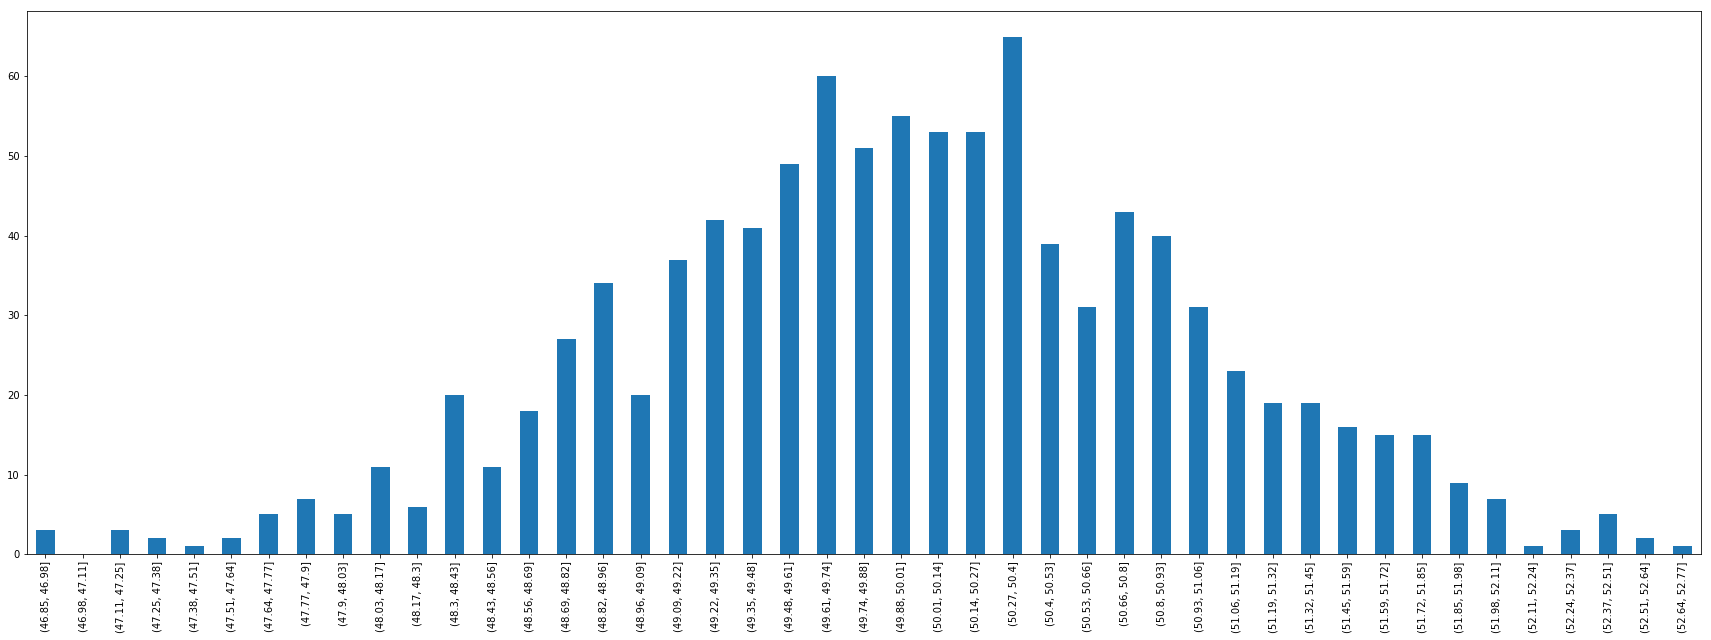

In [29]:
frecuencia_medias()

#### Tabla con 45 intervalos de igual tamaño para el rango de los desvios muestrales y su frecuencia

                Intervalos          Frecuencia
(7.91, 8.01]                                 1
(8.01, 8.1]                                  1
(8.1, 8.2]                                   2
(8.2, 8.29]                                  2
(8.29, 8.38]                                 2
(8.38, 8.48]                                 5
(8.48, 8.57]                                 2
(8.57, 8.67]                                 5
(8.67, 8.76]                                 4
(8.76, 8.86]                                10
(8.86, 8.95]                                13
(8.95, 9.05]                                18
(9.05, 9.14]                                24
(9.14, 9.24]                                26
(9.24, 9.33]                                29
(9.33, 9.43]                                37
(9.43, 9.52]                                44
(9.52, 9.62]                                30
(9.62, 9.71]                                41
(9.71, 9.81]                                61
(9.81, 9.9]  

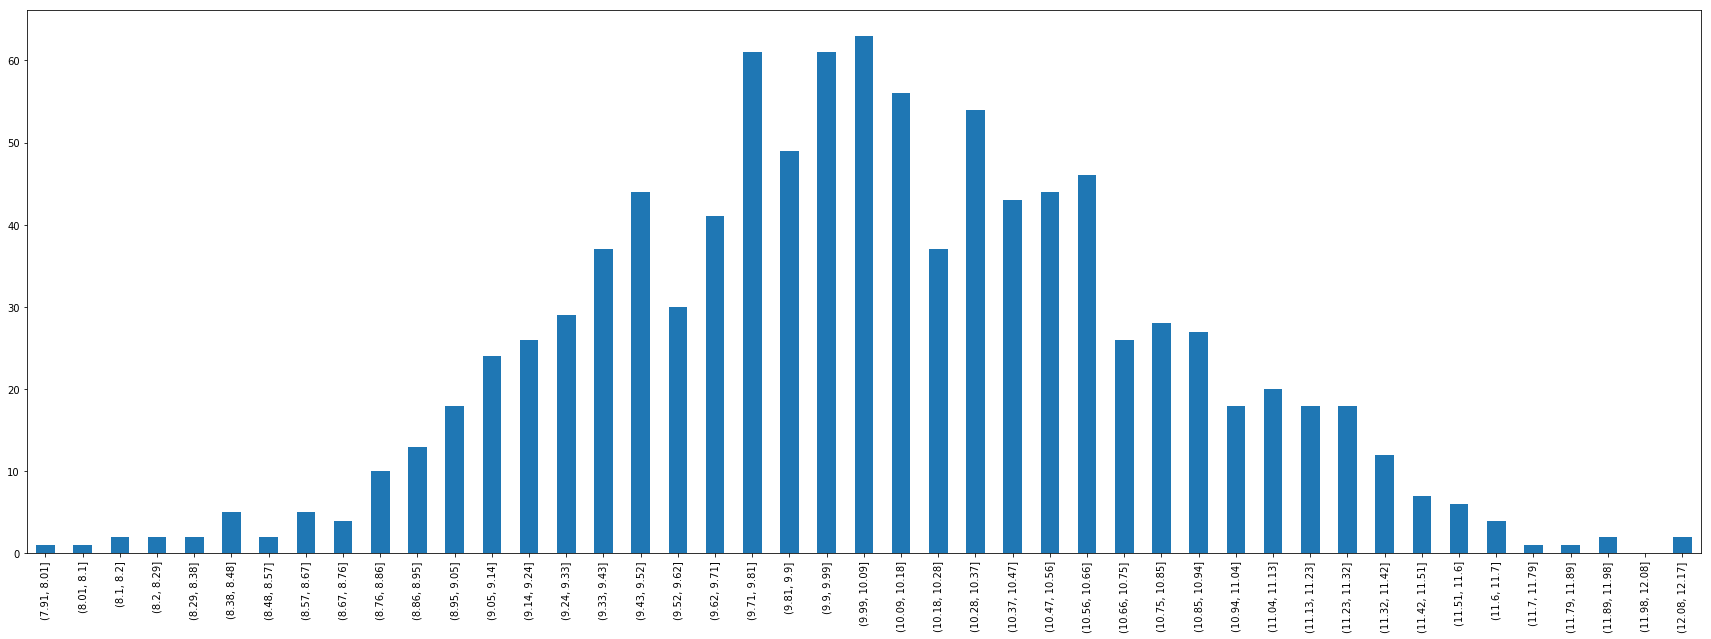

In [30]:
frecuencia_desvios()

In [31]:
media_desvio_de_medias(4000,100)

El promedios de las mil medias muestrales realizadas para esta población es:    49.979040294139025 



El desvio estandar de las mil medias muestrales realizadas para esta población es:    0.9875443336644376 



#### De los resultados obtenidos, podemos comprobar que, si sacasemos infinitas muestras de una población y calculasemos sus medias, el promedio de las medias muestrales tiende al valor de la media poblacional. Y, el calculo del desvío, demuestra que si sacasemos infinitas muestras de una población, las medias de las muestras variarían menos que las mediciones indivduales realizadas sobre la población entera. Esa relación se puede computar con los calculos hechos en la función "media_desvio_de_medias".

In [32]:
intervalos_confianza(4000,100)

99.95% de los intervalos de las medias contienen a la media poblacional


In [33]:
limpiar_listas()